<a href="https://colab.research.google.com/github/octagomez/Practico_191022/blob/practico2/Examen%20V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
- **Analizar y resolver**
- Subir a repositorio de Github, con al menos un pull request, y devolver el link

- Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


Utilizaremos modelos de aprendizaje Supervisado de clasificacion SVM y Logistic Regresion Muti-Target.
Elegiremos el set de datos Wines Class_Target = 3.
Este set de datos tiene una variable target a predecir (supervisado) y esta debe ser una etiqueta categorica no continua (clasificacion) tipo de vino.

El set de datos elegido contiene 13 variables predictoras y una variable target que clasifica en tres clases distintas (Clase 0, clase 1, clase 2) a los vinos.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# DATA LOAD

Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [ ]:
# Datos
# ==============================================================================

#PONER CODIGO AQUI
# Datos
# ==============================================================================

# SET SELECCIONADO VINOS  // https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


In [2]:
 # OPCION 1
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]

print(list(data.target_names))

['class_0', 'class_1', 'class_2']


In [5]:
print(type(data))
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

<class 'sklearn.utils.Bunch'>


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
 # OPCION 2
from sklearn.datasets import load_wine
data2 = load_wine()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data3 = pd.DataFrame(data= np.c_[data2['target'], data2['data']],
                     columns= ['target'] + data2['feature_names'] )
data3['target'].unique()

array([0., 1., 2.])

In [7]:
data3

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
datos = data3

In [9]:
data2['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

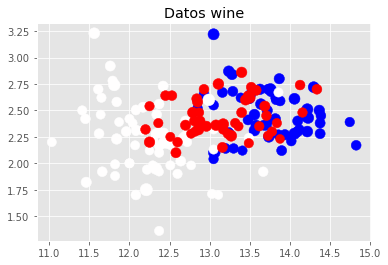

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.alcohol, datos.ash,datos.magnesium  , c=datos.target);
ax.set_title("Datos wine");

In [11]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']
class_names = ['class_0','class_1','class_2']

#PONER CODIGO AQUI

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# MODELO SVM - Maquina Soporte Vector

In [12]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 0.95, kernel = 'linear', random_state=123)

#PONER CODIGO AQUI
modelo.fit(X_train, y_train)

SVC(C=0.95, kernel='linear', random_state=123)

In [13]:
X_train.shape

(119, 13)

**Se realiza una busqueda en grilla de los mejores valores del hiperparametro C**
1 - Genero una duccionario con los parametros a elegir la cual llamaremos **grilla_hiperparametros**


In [20]:
grilla_hiperparametros = {
    'support vector machine':{
        'model':SVC(), # SVC() o NuSVC()
        'params':{
            'C':[1, 0.75, 0.5, 0.25], # parametros con lo que va a controlar la regularizacion por cada iteracion C tomara los parametros de la lista
            'kernel':['linear','sigmoide'] # Puede ser Lineal, Polinomial, Radial, Sigmoide // esto modifica el resultado del 
        }
    }
}

score=[]

for model_name, mp in grilla_hiperparametros.items():

    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    

In [15]:
#Verificamos cual de los valores de los hiperparametros dio el mejor resultado
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,support vector machine,0.924573,"{'C': 0.25, 'kernel': 'linear'}"


In [22]:
# CREO UN NUEVO MODELO CON LOS PARAMETROS OPTIMIZADOS
# Creación del modelo SVM lineal OPTIMIZADOS
# ==============================================================================
modelo_OP = SVC(C = 0.25, kernel = 'linear', random_state=123)
modelo_OP.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=123)

In [23]:
X_test.shape

(59, 13)

In [55]:
# Predicciones test
# ==============================================================================

#PONER CODIGO AQUI
predict_model_y = modelo.predict(X_test)
predict_modelOP_y = modelo_OP.predict(X_test)


In [25]:
accuracy_model = accuracy_score(
            y_true    = y_test,
            y_pred    = predict_model_y,
            normalize = True
           )
accuracy_model_OP = accuracy_score(
            y_true    = y_test,
            y_pred    = predict_modelOP_y,
            normalize = True
           )

In [26]:
# Accuracy de test del modelo 
# ==============================================================================

#PONER CODIGO AQUI

print("")
print(f"El accuracy MODEL de test es: {100*accuracy_model}%")
print(f"El accuracy MODEL_OP de test es: {100*accuracy_model_OP}%")


El accuracy MODEL de test es: 98.30508474576271%
El accuracy MODEL_OP de test es: 100.0%


 MATRIZ DE CONFUCION MODELO SVM - STANDAR


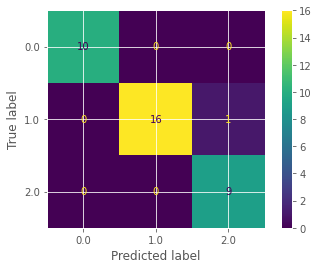

 MATRIZ DE CONFUCION MODELO SVM - OPTIMIZADO


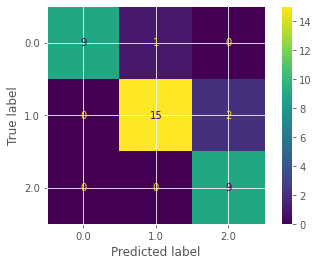

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
print( " MATRIZ DE CONFUSION MODELO SVM - STANDAR")
ConfusionMatrixDisplay.from_predictions(
   y_test, predict_model_y)

plt.show()

print( " MATRIZ DE CONFUSION MODELO SVM - OPTIMIZADO")
ConfusionMatrixDisplay.from_predictions(
   y_test, predict_modelOP_y)

plt.show()

# REGRESION LOGISTICA

In [27]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix # en desuso usar 
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## METODO SKlearn LogisticRegresion()


In [28]:
# Datos
# ==============================================================================
datos_RL = datos
datos_RL 

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [29]:
#Dividimos los datos
X = datos_RL.drop(columns = 'target')
y = datos_RL['target']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state=42)

In [30]:
X_train.shape

(142, 13)

In [32]:
#Normalizamos el dataset - para que todos los CAMPOS esten en la misma proporcion/escala/rango (* col1 = 10 cajones col2= 10 unidades =NORMALIZACION=> col1 = 10 cajones col2 = 0.20 cajones*)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalizado = min_max_scaler.fit_transform(X_train)
X_test_normalizado = min_max_scaler.fit_transform(X_test)


In [33]:
#Entrenamos el modelo
reglog=LogisticRegression()

reglog.max_iter=100
reglog.fit(X_train_normalizado, y_train)

LogisticRegression()

In [34]:
#Hacemos la predicción sobre los datos de testeo
predict = reglog.predict(X_test_normalizado)
predict

array([0., 0., 2., 0., 1., 0., 1., 2., 1., 2., 0., 2., 0., 2., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 2., 2., 2., 1., 1., 1., 0., 0., 1., 2., 0.,
       0., 0.])

In [35]:
#Verificamos que tan acertada fue la respuesta del modelo
accuracy = accuracy_score(y_test, predict)
accuracy
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 97.22222222222221%


In [36]:
#Imprimimos la matriz de confusión
conf = confusion_matrix(y_test, predict)
conf

array([[14,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  8]])

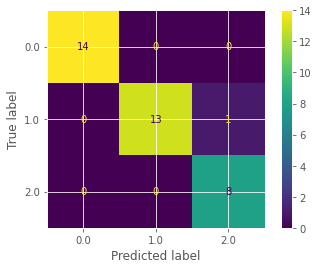

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
   y_test, predict)

plt.show()

## FMETODO Statsmodels - Falla en Logit

In [41]:
# Datos
# ==============================================================================
datos_RL_2 = datos
datos_RL_2

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [54]:
# División de los datos en train y test
# ==============================================================================
X = datos_RL_2.drop(columns = 'target')
y = datos_RL_2['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [43]:
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [52]:
y_train

array([[0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],

In [53]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
y_train = y_train.reshape(-1,1)
modelo = sm.Logit(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

ValueError: ignored

In [ ]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.predict(exog = X_train)
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

# COMPARATIVA DE MODELOS Y CONCLUSION


## Comoparamos los modelos atravez de su matriz de CONFUSION y acuarency.




 MATRIZ DE CONFUCION MODELO SVM - STANDAR


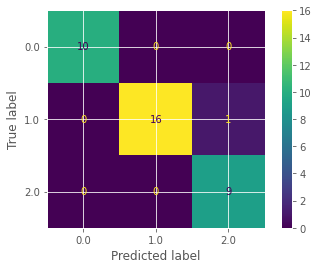

 MATRIZ DE CONFUCION MODELO SVM - OPTIMIZADO


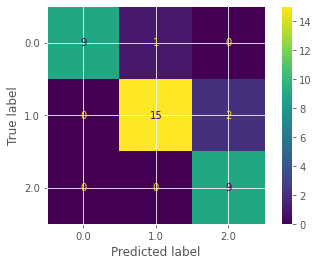

 MATRIZ DE CONFUCION MODELO REGRESION LOGISTICA MULTIPLE SKLEARN - OPTIMIZADO


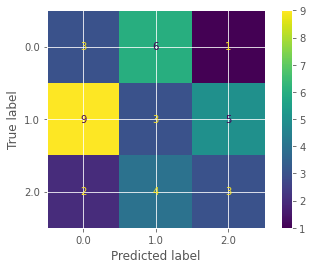


El accuracy SVM - MODEL de test es: 98.30508474576271%
El accuracy SVM - MODEL_OP de test es: 100.0%
El accuracy REGRESION LOGISTICA MULTIPLE es: 97.22222222222221%


In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
print( " MATRIZ DE CONFUSION MODELO SVM - STANDAR")
ConfusionMatrixDisplay.from_predictions(
   y_test, predict_model_y)

plt.show()

print( " MATRIZ DE CONFUSION MODELO SVM - OPTIMIZADO")
ConfusionMatrixDisplay.from_predictions(
   y_test, predict_modelOP_y)

plt.show()

print( " MATRIZ DE CONFUSION MODELO REGRESION LOGISTICA MULTIPLE SKLEARN - OPTIMIZADO")
ConfusionMatrixDisplay.from_predictions(
   y_test, predict)

plt.show()

print("")
print(f"El accuracy SVM - MODEL de test es: {100*accuracy_model}%")
print(f"El accuracy SVM - MODEL_OP de test es: {100*accuracy_model_OP}%")
print(f"El accuracy REGRESION LOGISTICA MULTIPLE es: {100*accuracy}%")

## CONCLUSION
- El modelo que mejor predice los tipos de vinos es el de Maquina Soporte Vector con Parametros optimizados.
Es decir que para una clasificacion multi variada el modelo  SVM (Suport Vector Machine) y utilizando la funcion ***grilla_hiperparametros*** obtenemos los mejores HIPERPARAMETROS para entrenar el modelo de manera optimizada.

El modelo de REGRESION LOGISTICA MULTIPLE puede explicar el 97% de los casos, nos indica que es un modelo apto para realizar tareas de clasificacion para el set de datos.

- Ademas para realizar la matriz de CONFUSION multi-targuet utilizamos la libreria from  ***sklearn.metrics import ConfusionMatrixDisplay*** recomendada en la documentacion de Skalearn.

# FUNCION grillaHiperparametrosInform

In [62]:
# FUNCION GRILLA_HIPER_PARAMETROS
kernel = ['linear','sigmoide','polinomial','radial']

def grillaHiperparametrosInform(X_train,y_train,kernel,cv=5):
  grilla_hiperparametros = {
      'support vector machine':{
          'model':SVC(), # SVC() o NuSVC()
          'params':{
              'C':[1, 0.75, 0.5, 0.25], # parametros con lo que va a controlar la regularizacion por cada iteracion C tomara los parametros de la lista
              'kernel': kernel # ['linear','sigmoide'] # Puede ser Lineal, Polinomial, Radial, Sigmoide // esto modifica el resultado del 
          }
      }
  }

  score=[]

  for model_name, mp in grilla_hiperparametros.items():

      clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
      clf.fit(X_train, y_train)

      score.append({
          'model':model_name,
          'best_score': clf.best_score_,
          'best_params': clf.best_params_
      })
  print(pd.DataFrame(score,columns=['model','best_score','best_params']), cv, )

In [61]:
grillaHiperparametrosInform(X_train,y_train,kernel)

NameError: ignored